In [29]:
import pandas, seaborn
import matplotlib

In [4]:
expression_file = '/Users/adrian/research/vigur/data/transcriptomics/DESeq2_TPM_values.tsv'
metadata_file = '/Users/adrian/research/vigur/metadata/transcriptomics/vigur_metadata_experiment3.tsv'

In [5]:
receptors = {}
receptors['ADRA1A'] = 'ENSG00000120907'
receptors['ADRA1B'] = 'ENSG00000170214'
receptors['ADRA1D'] = 'ENSG00000171873'

receptors['ADRA2A'] = 'ENSG00000150594'
receptors['ADRA2B'] = 'ENSG00000274286'
receptors['ADRA2C'] = 'ENSG00000184160'

receptors['ADRB1'] = 'ENSG00000043591'
receptors['ADRB2'] = 'ENSG00000169252'
receptors['ADRB3'] = 'ENSG00000188778'

receptors

In [6]:
expression = pandas.read_csv(expression_file, sep='\t', index_col=0)

In [7]:
print(expression.shape)
expression.head()

(61881, 25)


,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,RSS_HLMV_37,RSS_HLMV_38,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSG00000000003,38.526890,35.309339,39.840736,41.951376,38.061629,38.565773,38.346359,43.985521,43.715238,32.005577,...,35.204046,36.511499,29.939159,31.072017,40.662226,36.395800,24.905552,35.040346,30.920235,37.974110
ENSG00000000005,0.000000,0.000000,0.000000,0.278312,0.000000,0.000000,0.000000,0.000000,0.458944,0.075399,...,0.000000,0.000000,0.177716,0.059379,0.000000,0.000000,0.000000,0.116122,0.015197,0.000000
ENSG00000000419,69.415227,49.131680,66.184838,92.956950,88.650591,85.447069,127.356106,157.183636,150.956365,118.875515,...,113.265541,106.959497,99.429725,85.549739,102.582479,100.516519,84.135830,95.060423,96.772840,107.100754
ENSG00000000457,3.331287,2.858376,3.504064,5.829721,5.274378,4.404222,3.822031,5.466647,6.620200,4.851150,...,3.444193,3.965564,3.876106,3.360422,4.843100,4.291843,2.957526,4.852541,3.489343,3.486497
ENSG00000000460,2.744336,3.172060,3.679316,4.587781,3.403177,3.809046,3.916106,4.543919,3.736573,2.749359,...,3.024118,3.693697,2.545423,2.743481,3.342448,3.326444,3.072015,3.377629,2.217106,3.247478


In [8]:
metadata = pandas.read_csv(metadata_file, sep='\t')

In [9]:
print(metadata.shape)
metadata

(27, 4)


,sample,time,treatment,replicate
0,RSS_HLMV_28,zero,zero,A
1,RSS_HLMV_29,zero,zero,B
2,RSS_HLMV_30,zero,zero,C
3,RSS_HLMV_31,four,zero,A
4,RSS_HLMV_32,four,zero,B
5,RSS_HLMV_33,four,zero,C
6,RSS_HLMV_34,four,half,A
7,NaN,NaN,NaN,NaN
8,RSS_HLMV_36,four,half,C
9,RSS_HLMV_37,four,five,A


In [10]:
ensembl_IDs = [receptors[element] for element in receptors]
ensembl_IDs

gene_IDs = [element for element in receptors]
gene_IDs

reverse_names = {}
for i in range(len(ensembl_IDs)):
    reverse_names[ensembl_IDs[i]] = gene_IDs[i]
print(reverse_names)

{'ENSG00000120907': 'ADRA1A', 'ENSG00000170214': 'ADRA1B', 'ENSG00000171873': 'ADRA1D', 'ENSG00000150594': 'ADRA2A', 'ENSG00000274286': 'ADRA2B', 'ENSG00000184160': 'ADRA2C', 'ENSG00000043591': 'ADRB1', 'ENSG00000169252': 'ADRB2', 'ENSG00000188778': 'ADRB3'}


In [11]:
RE = expression.loc[ensembl_IDs, ]
print(RE.shape)
RE.head()

(9, 25)


,RSS_HLMV_28,RSS_HLMV_29,RSS_HLMV_30,RSS_HLMV_31,RSS_HLMV_32,RSS_HLMV_33,RSS_HLMV_34,RSS_HLMV_36,RSS_HLMV_37,RSS_HLMV_38,...,RSS_HLMV_45,RSS_HLMV_46,RSS_HLMV_47,RSS_HLMV_48,RSS_HLMV_49,RSS_HLMV_50,RSS_HLMV_51,RSS_HLMV_52,RSS_HLMV_53,RSS_HLMV_54
ENSG00000120907,0.645945,0.475396,0.954559,1.030611,0.324095,1.231811,1.196277,0.476226,1.113013,0.867746,...,0.336391,0.522173,1.125093,0.396394,0.668122,0.890878,0.239800,0.933404,0.369529,0.396484
ENSG00000170214,3.490505,4.646013,3.766698,7.378613,8.910441,9.834571,15.613333,14.477952,12.801416,17.287635,...,3.007376,4.794734,6.592639,6.319339,5.074288,4.641797,7.926545,6.555149,8.957622,7.371151
ENSG00000171873,0.563586,0.612844,0.115313,0.908234,0.690792,1.212096,0.526848,0.457907,0.938254,0.422140,...,0.241040,0.520780,0.271844,0.247133,0.450535,0.220881,0.308026,0.214701,0.556620,0.584908
ENSG00000150594,0.022345,0.000000,0.052256,0.065776,0.226145,0.312349,0.185888,0.209912,0.212939,0.201021,...,0.014163,0.000000,0.012218,0.000000,0.001961,0.000000,0.032619,0.015303,0.000000,0.004582
ENSG00000274286,0.000000,0.000000,0.000000,0.000000,0.000000,0.015708,0.000000,0.001901,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.003979,0.000000,0.001324,0.003450,0.000000,0.000000


In [12]:
sub_samples = metadata[metadata['time'] == 'zero']['sample']
print(sub_samples)
average = RE[sub_samples].mean(axis=1)
average.head()

TPM = pandas.DataFrame(average)
TPM.rename(columns={0:'T0_zero'}, inplace=True)
TPM.head()

0    RSS_HLMV_28
1    RSS_HLMV_29
2    RSS_HLMV_30
Name: sample, dtype: object


,T0_zero
ENSG00000120907,0.691966
ENSG00000170214,3.967739
ENSG00000171873,0.430581
ENSG00000150594,0.024867
ENSG00000274286,0.000000


In [13]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'zero')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_zero'] = average
TPM.head()

        sample  time treatment replicate
3  RSS_HLMV_31  four      zero         A
4  RSS_HLMV_32  four      zero         B
5  RSS_HLMV_33  four      zero         C


,T0_zero,T4_zero
ENSG00000120907,0.691966,0.862172
ENSG00000170214,3.967739,8.707875
ENSG00000171873,0.430581,0.937041
ENSG00000150594,0.024867,0.201423
ENSG00000274286,0.000000,0.005236


In [14]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'half')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_half'] = average
TPM.head()

        sample  time treatment replicate
6  RSS_HLMV_34  four      half         A
8  RSS_HLMV_36  four      half         C


,T0_zero,T4_zero,T4_half
ENSG00000120907,0.691966,0.862172,0.836252
ENSG00000170214,3.967739,8.707875,15.045642
ENSG00000171873,0.430581,0.937041,0.492377
ENSG00000150594,0.024867,0.201423,0.197900
ENSG00000274286,0.000000,0.005236,0.000951


In [15]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'five')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_five'] = average
TPM.head()

         sample  time treatment replicate
9   RSS_HLMV_37  four      five         A
10  RSS_HLMV_38  four      five         B
11  RSS_HLMV_39  four      five         C


,T0_zero,T4_zero,T4_half,T4_five
ENSG00000120907,0.691966,0.862172,0.836252,0.981353
ENSG00000170214,3.967739,8.707875,15.045642,13.663954
ENSG00000171873,0.430581,0.937041,0.492377,0.622652
ENSG00000150594,0.024867,0.201423,0.197900,0.173318
ENSG00000274286,0.000000,0.005236,0.000951,0.000000


In [16]:
sub_samples = metadata[(metadata['time'] == 'four') & (metadata['treatment'] == 'fifty')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T4_fifty'] = average
TPM.head()

         sample  time treatment replicate
13  RSS_HLMV_41  four     fifty         B
14  RSS_HLMV_42  four     fifty         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty
ENSG00000120907,0.691966,0.862172,0.836252,0.981353,0.777227
ENSG00000170214,3.967739,8.707875,15.045642,13.663954,9.155183
ENSG00000171873,0.430581,0.937041,0.492377,0.622652,0.404553
ENSG00000150594,0.024867,0.201423,0.197900,0.173318,0.202343
ENSG00000274286,0.000000,0.005236,0.000951,0.000000,0.000844


In [17]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'zero')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_zero'] = average
TPM.head()

         sample        time treatment replicate
15  RSS_HLMV_43  twentyfour      zero         A
16  RSS_HLMV_44  twentyfour      zero         B
17  RSS_HLMV_45  twentyfour      zero         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero
ENSG00000120907,0.691966,0.862172,0.836252,0.981353,0.777227,0.411889
ENSG00000170214,3.967739,8.707875,15.045642,13.663954,9.155183,3.574520
ENSG00000171873,0.430581,0.937041,0.492377,0.622652,0.404553,0.200868
ENSG00000150594,0.024867,0.201423,0.197900,0.173318,0.202343,0.009537
ENSG00000274286,0.000000,0.005236,0.000951,0.000000,0.000844,0.000000


In [18]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'half')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_half'] = average
TPM.head()

         sample        time treatment replicate
18  RSS_HLMV_46  twentyfour      half         A
19  RSS_HLMV_47  twentyfour      half         B
20  RSS_HLMV_48  twentyfour      half         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half
ENSG00000120907,0.691966,0.862172,0.836252,0.981353,0.777227,0.411889,0.681220
ENSG00000170214,3.967739,8.707875,15.045642,13.663954,9.155183,3.574520,5.902238
ENSG00000171873,0.430581,0.937041,0.492377,0.622652,0.404553,0.200868,0.346586
ENSG00000150594,0.024867,0.201423,0.197900,0.173318,0.202343,0.009537,0.004073
ENSG00000274286,0.000000,0.005236,0.000951,0.000000,0.000844,0.000000,0.000000


In [19]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'five')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_five'] = average
TPM.head()

         sample        time treatment replicate
21  RSS_HLMV_49  twentyfour      five         A
22  RSS_HLMV_50  twentyfour      five         B
23  RSS_HLMV_51  twentyfour      five         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half,T24_five
ENSG00000120907,0.691966,0.862172,0.836252,0.981353,0.777227,0.411889,0.681220,0.599600
ENSG00000170214,3.967739,8.707875,15.045642,13.663954,9.155183,3.574520,5.902238,5.880876
ENSG00000171873,0.430581,0.937041,0.492377,0.622652,0.404553,0.200868,0.346586,0.326481
ENSG00000150594,0.024867,0.201423,0.197900,0.173318,0.202343,0.009537,0.004073,0.011527
ENSG00000274286,0.000000,0.005236,0.000951,0.000000,0.000844,0.000000,0.000000,0.001768


In [20]:
sub_samples = metadata[(metadata['time'] == 'twentyfour') & (metadata['treatment'] == 'fifty')]
print(sub_samples)
average = RE[sub_samples['sample']].mean(axis=1)
average.head()
TPM['T24_fifty'] = average
TPM.head()

         sample        time treatment replicate
24  RSS_HLMV_52  twentyfour     fifty         A
25  RSS_HLMV_53  twentyfour     fifty         B
26  RSS_HLMV_54  twentyfour     fifty         C


,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half,T24_five,T24_fifty
ENSG00000120907,0.691966,0.862172,0.836252,0.981353,0.777227,0.411889,0.681220,0.599600,0.566473
ENSG00000170214,3.967739,8.707875,15.045642,13.663954,9.155183,3.574520,5.902238,5.880876,7.627974
ENSG00000171873,0.430581,0.937041,0.492377,0.622652,0.404553,0.200868,0.346586,0.326481,0.452077
ENSG00000150594,0.024867,0.201423,0.197900,0.173318,0.202343,0.009537,0.004073,0.011527,0.006628
ENSG00000274286,0.000000,0.005236,0.000951,0.000000,0.000844,0.000000,0.000000,0.001768,0.001150


In [21]:
TPM.rename(reverse_names, axis='index', inplace=True)
TPM

,T0_zero,T4_zero,T4_half,T4_five,T4_fifty,T24_zero,T24_half,T24_five,T24_fifty
ADRA1A,0.691966,0.862172,0.836252,0.981353,0.777227,0.411889,0.681220,0.599600,0.566473
ADRA1B,3.967739,8.707875,15.045642,13.663954,9.155183,3.574520,5.902238,5.880876,7.627974
ADRA1D,0.430581,0.937041,0.492377,0.622652,0.404553,0.200868,0.346586,0.326481,0.452077
ADRA2A,0.024867,0.201423,0.197900,0.173318,0.202343,0.009537,0.004073,0.011527,0.006628
ADRA2B,0.000000,0.005236,0.000951,0.000000,0.000844,0.000000,0.000000,0.001768,0.001150
ADRA2C,0.178160,0.310815,0.211830,0.200145,0.175186,0.118833,0.052644,0.063332,0.118046
ADRB1,1.133784,1.001526,0.845270,1.001315,0.689026,2.119862,2.134722,1.748170,2.127912
ADRB2,4.007686,2.413982,1.778069,1.946784,1.614817,4.024592,4.683117,5.029589,5.713232
ADRB3,0.115982,0.150462,0.116458,0.263879,0.128391,0.152021,0.129954,0.190905,0.155259


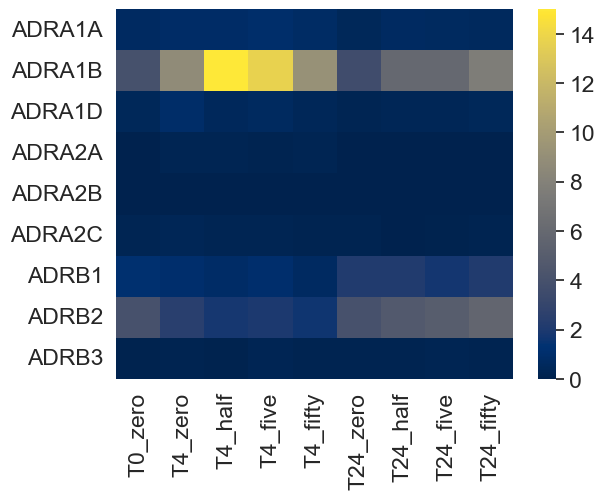

In [30]:
seaborn.set(font_scale=1.5)
seaborn.heatmap(TPM, cmap='cividis', vmin=0, vmax=15)
matplotlib.pyplot.savefig('heatmap.svg')